# PowerGrid Insights: Illuminating America's Outage Landscape

**Name(s)**: Eric Sun & Sunan Xu

**Website Link**: https://ericsun153.github.io/Illuminating_US_Outage_Landscape/

## Question Identification

How do demographic factors of West Coast states influence the duration and affecting range of power outages, and what mitigation strategies can be employed to reduce the risk of outages in these regions?

## Setup

In [22]:
import pandas as pd
import numpy as np
import os

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'png'
pd.options.plotting.backend = 'plotly'


import matplotlib as plt
import seaborn as sns

Since the file type of our dataset is xlsx, we first convert it into csv file using the **openpyxl** library and store it into a csv file called 'outage.csv'.

In [2]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [3]:
xlsx_file = 'outage.xlsx'
csv_file = 'outage.csv'

df = pd.read_excel(xlsx_file)

# Write the DataFrame to a CSV file
df.to_csv(csv_file, index=False)
df = pd.read_csv('outage.csv')
df

Major power outage events in the continental U.S. Unnamed: 1 Unnamed: 2  \
0                 Time period: January 2000 - July 2016        NaN        NaN   
1     Regions affected: Outages reported in this dat...        NaN        NaN   
2                                                   NaN        NaN        NaN   
3                                                   NaN        NaN        NaN   
4                                             variables        OBS       YEAR   
...                                                 ...        ...        ...   
1535                                                NaN       1530       2011   
1536                                                NaN       1531       2006   
1537                                                NaN       1532       2009   
1538                                                NaN       1533       2009   
1539                                                NaN       1534       2000   

     Unnamed: 3    Unnamed: 4   Unnamed: 5   Unnamed: 6          Unnamed: 7  \
0           NaN           NaN          NaN          NaN                 NaN   
1           NaN           NaN          NaN          NaN                 NaN   
2           NaN           NaN          NaN          NaN                 NaN   
3           NaN           NaN          NaN          NaN                 NaN   
4         MONTH    U.S._STATE  POSTAL.CODE  NERC.REGION      CLIMATE.REGION   
...         ...           ...          ...          ...                 ...   
1535         12  North Dakota           ND          MRO  West North Central   
1536        NaN  North Dakota           ND          MRO  West North Central   
1537          8  South Dakota           SD          RFC  West North Central   
1538          8  South Dakota           SD          MRO  West North Central   
1539        NaN        Alaska           AK         ASCC                 NaN   

         Unnamed: 8        Unnamed: 9  ...   Unnamed: 47 Unnamed: 48  \
0               NaN               NaN  ...           NaN         NaN   
1               NaN               NaN  ...           NaN         NaN   
2               NaN               NaN  ...           NaN         NaN   
3               NaN               NaN  ...           NaN         NaN   
4     ANOMALY.LEVEL  CLIMATE.CATEGORY  ...  POPPCT_URBAN   POPPCT_UC   
...             ...               ...  ...           ...         ...   
1535           -0.9              cold  ...          59.9        19.9   
1536            NaN               NaN  ...          59.9        19.9   
1537            0.5              warm  ...         56.65       26.73   
1538            0.5              warm  ...         56.65       26.73   
1539            NaN               NaN  ...         66.02       21.56   

       Unnamed: 49 Unnamed: 50   Unnamed: 51    Unnamed: 52 Unnamed: 53  \
0              NaN         NaN           NaN            NaN         NaN   
1              NaN         NaN           NaN            NaN         NaN   
2              NaN         NaN           NaN            NaN         NaN   
3              NaN         NaN           NaN            NaN         NaN   
4     POPDEN_URBAN   POPDEN_UC  POPDEN_RURAL  AREAPCT_URBAN  AREAPCT_UC   
...            ...         ...           ...            ...         ...   
1535        2192.2      1868.2           3.9           0.27         0.1   
1536        2192.2      1868.2           3.9           0.27         0.1   
1537        2038.3      1905.4           4.7            0.3        0.15   
1538        2038.3      1905.4           4.7            0.3        0.15   
1539        1802.6        1276           0.4           0.05        0.02   

           Unnamed: 54       Unnamed: 55       Unnamed: 56  
0                  NaN               NaN               NaN  
1                  NaN               NaN               NaN  
2                  NaN               NaN               NaN  
3                  NaN               NaN               NaN  
4            

## Data Cleaning

First 5 rows are the header of the dataset, we drop them and filter it into correct format in each column

In [4]:
rows_to_skip = list(range(5))
df = pd.read_csv('outage.csv', skiprows=rows_to_skip, index_col='OBS')

# Combine the units line and column names, drop unecessary rows and columns
column = np.array(df.columns).astype('str')
unites = np.array(df.iloc[0].fillna('')).astype('str')
unites = ["(" + i + ")" for i in unites]
for i in range(len(unites)):
    if unites[i] == '()':
        unites[i] = ''
combined_column = np.core.defchararray.add(column, unites)
df.columns = combined_column
df = df.reset_index().drop(0).drop('variables(Units)', axis=1).reset_index(drop=True)
df

OBS    YEAR  MONTH    U.S._STATE POSTAL.CODE NERC.REGION  \
0        1.0  2011.0    7.0     Minnesota          MN         MRO   
1        2.0  2014.0    5.0     Minnesota          MN         MRO   
2        3.0  2010.0   10.0     Minnesota          MN         MRO   
3        4.0  2012.0    6.0     Minnesota          MN         MRO   
4        5.0  2015.0    7.0     Minnesota          MN         MRO   
...      ...     ...    ...           ...         ...         ...   
1529  1530.0  2011.0   12.0  North Dakota          ND         MRO   
1530  1531.0  2006.0    NaN  North Dakota          ND         MRO   
1531  1532.0  2009.0    8.0  South Dakota          SD         RFC   
1532  1533.0  2009.0    8.0  South Dakota          SD         MRO   
1533  1534.0  2000.0    NaN        Alaska          AK        ASCC   

          CLIMATE.REGION ANOMALY.LEVEL(numeric) CLIMATE.CATEGORY  \
0     East North Central                   -0.3           normal   
1     East North Central                   -0.1           normal   
2     East North Central                   -1.5             cold   
3     East North Central                   -0.1           normal   
4     East North Central                    1.2             warm   
...                  ...                    ...              ...   
1529  West North Central                   -0.9             cold   
1530  West North Central                    NaN              NaN   
1531  West North Central                    0.5             warm   
1532  West North Central                    0.5             warm   
1533                 NaN                    NaN              NaN   

     OUTAGE.START.DATE(Day of the week, Month Day, Year)  ... POPPCT_URBAN(%)  \
0                                   2011-07-01 00:00:00   ...           73.27   
1                                   2014-05-11 00:00:00   ...           73.27   
2                                   2010-10-26 00:00:00   ...           73.27   
3                                   2012-06-19 00:00:00   ...           73.27   
4                                   2015-07-18 00:00:00   ...           73.27   
...                                                 ...   ...             ...   
1529                                2011-12-06 00:00:00   ...            59.9   
1530                                                NaN   ...            59.9   
1531                                2009-08-29 00:00:00   ...           56.65   
1532                                2009-08-29 00:00:00   ...           56.65   
1533                                                NaN   ...           66.02   

     POPPCT_UC(%) POPDEN_URBAN(persons per square mile)  \
0           15.28                                  2279   
1           15.28                                  2279   
2           15.28                                  2279   
3           15.28                                  2279   
4           15.28                                  2279   
...           ...                                   ...   
1529         19.9                                2192.2   
1530         19.9                                2192.2   
1531        26.73                                2038.3   
1532        26.73                                2038.3   
1533        21.56                                1802.6   

     POPDEN_UC(persons per square mile) POPDEN_RURAL(persons per square mile)  \
0                                1700.5                                  18.2   
1                                1700.5                                  18.2   
2                                1700.5                                  18.2   
3                                1700.5                                  18.2   
4                                1700.5                                  18.2   
...                                 ...                                   ...   
1529                             1868.2                                   3.9   
1530                             

In [5]:
df['YEAR'] = df['YEAR'].astype('int')
# Combine 'OUTAGE.START.DATE' and 'OUTAGE.START.TIME' into a new pd.Timestamp column called 'OUTAGE.START'
start_time = df['OUTAGE.START.TIME(Hour:Minute:Second (AM / PM))']
start_date = df['OUTAGE.START.DATE(Day of the week, Month Day, Year)']
df["OUTAGE.START"] = pd.to_datetime(start_date + " " + start_time)
# combine 'OUTAGE.RESTORATION.DATE' and 'OUTAGE.RESTORATION.TIME' into a new pd.Timestamp column called 'OUTAGE.RESTORATION'.
end_time = df['OUTAGE.RESTORATION.TIME(Hour:Minute:Second (AM / PM))']
end_date = df['OUTAGE.RESTORATION.DATE(Day of the week, Month Day, Year)']
df["OUTAGE.RESTORATION"] = pd.to_datetime(end_date + " " + end_time)
df[['OUTAGE.RESTORATION', 'OUTAGE.START']]

OUTAGE.RESTORATION        OUTAGE.START
0    2011-07-03 20:00:00 2011-07-01 17:00:00
1    2014-05-11 18:39:00 2014-05-11 18:38:00
2    2010-10-28 22:00:00 2010-10-26 20:00:00
3    2012-06-20 23:00:00 2012-06-19 04:30:00
4    2015-07-19 07:00:00 2015-07-18 02:00:00
...                  ...                 ...
1529 2011-12-06 20:00:00 2011-12-06 08:00:00
1530                 NaT                 NaT
1531 2009-08-29 23:53:00 2009-08-29 22:54:00
1532 2009-08-29 14:01:00 2009-08-29 11:00:00
1533                 NaT                 NaT

[1534 rows x 2 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 58 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   OBS                                                        1534 non-null   float64       
 1   YEAR                                                       1534 non-null   int32         
 2   MONTH                                                      1525 non-null   float64       
 3   U.S._STATE                                                 1534 non-null   object        
 4   POSTAL.CODE                                                1534 non-null   object        
 5   NERC.REGION                                                1534 non-null   object        
 6   CLIMATE.REGION                                             1528 non-null   object        
 7   ANOMALY.LEVEL(numeric)           

We should then convert all the columns into proper data types

In [7]:
df['ANOMALY.LEVEL'] = df['ANOMALY.LEVEL(numeric)'].astype(float)
df = df.drop(columns=['ANOMALY.LEVEL(numeric)', 'OUTAGE.START.DATE(Day of the week, Month Day, Year)',
                      'OUTAGE.START.TIME(Hour:Minute:Second (AM / PM))', 
                      'OUTAGE.RESTORATION.DATE(Day of the week, Month Day, Year)',
                      'OUTAGE.RESTORATION.TIME(Hour:Minute:Second (AM / PM))'], axis=1)

In [8]:
columns_to_convert = {'OUTAGE.DURATION(mins)': float, 'DEMAND.LOSS.MW(Megawatt)': float,
                      'RES.PRICE(cents / kilowatt-hour)': float, 'COM.PRICE(cents / kilowatt-hour)': float,
                     'COM.PRICE(cents / kilowatt-hour)':float, 'IND.PRICE(cents / kilowatt-hour)': float,
                     'TOTAL.PRICE(cents / kilowatt-hour)':float, 'RES.SALES(Megawatt-hour)': float,
                     'COM.SALES(Megawatt-hour)':float, 'IND.SALES(Megawatt-hour)':float, 'TOTAL.PRICE(cents / kilowatt-hour)':float,
                     'RES.PERCEN(%)':float, 'COM.PERCEN(%)':float, 'IND.PERCEN(%)':float, 'RES.CUST.PCT(%)':float,
                     'COM.CUST.PCT(%)':float, 'IND.CUST.PCT(%)':float, 'PC.REALGSP.STATE(USD)':float, 'PC.REALGSP.USA(USD)':float,
                     'PC.REALGSP.REL(fraction)':float, 'PC.REALGSP.CHANGE(%)':float, 'UTIL.REALGSP(USD)':float, 'TOTAL.REALGSP(USD)':float,
                     'UTIL.CONTRI(%)':float, 'PI.UTIL.OFUSA(%)':float, 'POPPCT_URBAN(%)':float, 'POPPCT_UC(%)':float, 
                     'POPDEN_URBAN(persons per square mile)':float, 'POPDEN_UC(persons per square mile)':float, 
                     'POPDEN_RURAL(persons per square mile)':float, 'AREAPCT_URBAN(%)':float, 'AREAPCT_UC(%)':float,
                     'PCT_LAND(%)':float, 'PCT_WATER_TOT(%)':float, 'PCT_WATER_INLAND(%)':float,'TOTAL.SALES(Megawatt-hour)':float}

In [9]:
df = df.astype(columns_to_convert)
df

OBS  YEAR  MONTH    U.S._STATE POSTAL.CODE NERC.REGION  \
0        1.0  2011    7.0     Minnesota          MN         MRO   
1        2.0  2014    5.0     Minnesota          MN         MRO   
2        3.0  2010   10.0     Minnesota          MN         MRO   
3        4.0  2012    6.0     Minnesota          MN         MRO   
4        5.0  2015    7.0     Minnesota          MN         MRO   
...      ...   ...    ...           ...         ...         ...   
1529  1530.0  2011   12.0  North Dakota          ND         MRO   
1530  1531.0  2006    NaN  North Dakota          ND         MRO   
1531  1532.0  2009    8.0  South Dakota          SD         RFC   
1532  1533.0  2009    8.0  South Dakota          SD         MRO   
1533  1534.0  2000    NaN        Alaska          AK        ASCC   

          CLIMATE.REGION CLIMATE.CATEGORY         CAUSE.CATEGORY  \
0     East North Central           normal         severe weather   
1     East North Central           normal     intentional attack   
2     East North Central             cold         severe weather   
3     East North Central           normal         severe weather   
4     East North Central             warm         severe weather   
...                  ...              ...                    ...   
1529  West North Central             cold          public appeal   
1530  West North Central              NaN  fuel supply emergency   
1531  West North Central             warm              islanding   
1532  West North Central             warm              islanding   
1533                 NaN              NaN      equipment failure   

     CAUSE.CATEGORY.DETAIL  ... POPDEN_UC(persons per square mile)  \
0                      NaN  ...                             1700.5   
1                vandalism  ...                             1700.5   
2               heavy wind  ...                             1700.5   
3             thunderstorm  ...                             1700.5   
4                      NaN  ...                             1700.5   
...                    ...  ...                                ...   
1529                   NaN  ...                             1868.2   
1530                  Coal  ...                             1868.2   
1531                   NaN  ...                             1905.4   
1532                   NaN  ...                             1905.4   
1533               failure  ...                             1276.0   

      POPDEN_RURAL(persons per square mile)  AREAPCT_URBAN(%)  AREAPCT_UC(%)  \
0                                      18.2              2.14           0.60   
1                                      18.2              2.14           0.60   
2                                      18.2              2.14           0.60   
3                                      18.2              2.14           0.60   
4                                      18.2              2.14           0.60   
...                                     ...               ...            ...   
1529                                    3.9              0.27           0.10   
1530                                    3.9              0.27           0.10   
1531                                    4.7              0.30           0.15   
1532                                    4.7              0.30           0.15   
1533                                    0.4              0.05           0.02   

      PCT_LAND(%)  PCT_WATER_TOT(%)  PCT_WATER_INLAND(%)        OUTAGE.START  \
0       91.592666          8.407334             5.478743 2011-07-01 17:00:00   
1       91.592666          8.407334             5.478743 2014-05-11 18:38:00   
2       91.592666          8.407334             5.478743 2010-10-26 20:00:00   
3       91.592666          8.407334             5.478743 2012-06-19 04:30:00   
4       91.592666          8.407334             5.478743 2015-07-18 02:00:00   
...           ...               ...                  ...                 ...   
1529    97.599649        

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   OBS                                    1534 non-null   float64       
 1   YEAR                                   1534 non-null   int32         
 2   MONTH                                  1525 non-null   float64       
 3   U.S._STATE                             1534 non-null   object        
 4   POSTAL.CODE                            1534 non-null   object        
 5   NERC.REGION                            1534 non-null   object        
 6   CLIMATE.REGION                         1528 non-null   object        
 7   CLIMATE.CATEGORY                       1525 non-null   object        
 8   CAUSE.CATEGORY                         1534 non-null   object        
 9   CAUSE.CATEGORY.DETAIL                  1063 non-null   object  

In [11]:
all_values = df.value_counts()

In [35]:
df[df['CLIMATE.REGION'] == 'West']['U.S._STATE'].value_counts()

California    210
Nevada          7
Name: U.S._STATE, dtype: int64

## EDA

### Univariate Analysis

We can first find some relationship or patterns within columns

In [12]:
all_states = df['U.S._STATE'].value_counts()
all_states

California              210
Texas                   127
Washington               97
Michigan                 95
New York                 71
Maryland                 58
Pennsylvania             57
Illinois                 46
Florida                  45
Ohio                     43
Indiana                  43
Utah                     41
Delaware                 41
North Carolina           40
Louisiana                40
Virginia                 37
New Jersey               35
Tennessee                34
Arizona                  28
Oregon                   26
Arkansas                 25
Oklahoma                 24
Wisconsin                20
Maine                    19
Massachusetts            18
Connecticut              18
Georgia                  17
Missouri                 17
Colorado                 15
Minnesota                15
New Hampshire            14
Kentucky                 13
District of Columbia     10
Idaho                     9
Vermont                   9
Kansas              

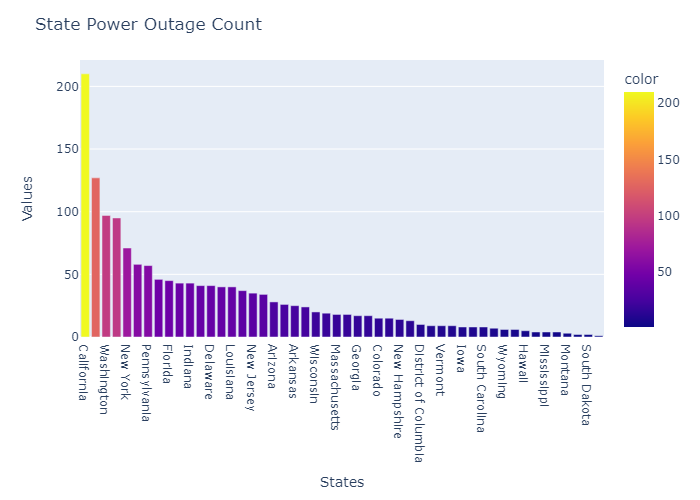

In [23]:
fig = px.bar(all_states, color=all_states.values)
fig.update_layout(title='State Power Outage Count', xaxis_title='States', yaxis_title='Values')
# fig.write_html('state_power_outage_count.html', include_plotlyjs='cdn')

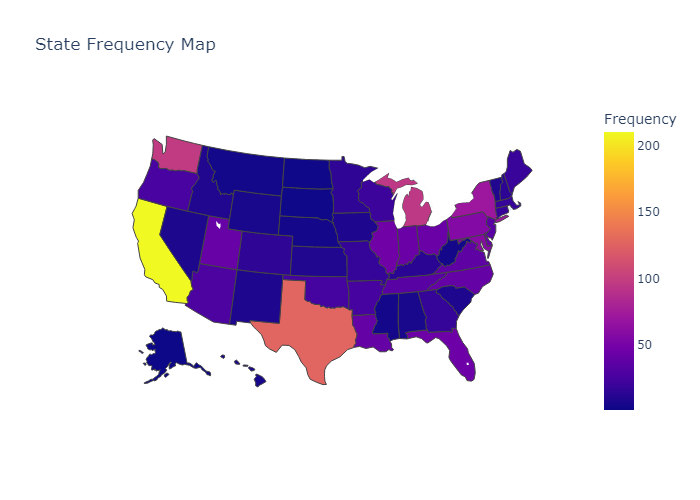

In [24]:
state_counts = df['POSTAL.CODE'].value_counts().reset_index()
state_counts.columns = ['POSTAL.CODE', 'Frequency']

# Create the geospatial graph
fig = px.choropleth(state_counts, 
                    locations='POSTAL.CODE', 
                    locationmode='USA-states',
                    color='Frequency',
                    scope='usa',
                    labels={'Frequency': 'Frequency'},
                    title='State Frequency Map')

fig.show()
# fig.write_html('state_frequency_map.html', include_plotlyjs='cdn')

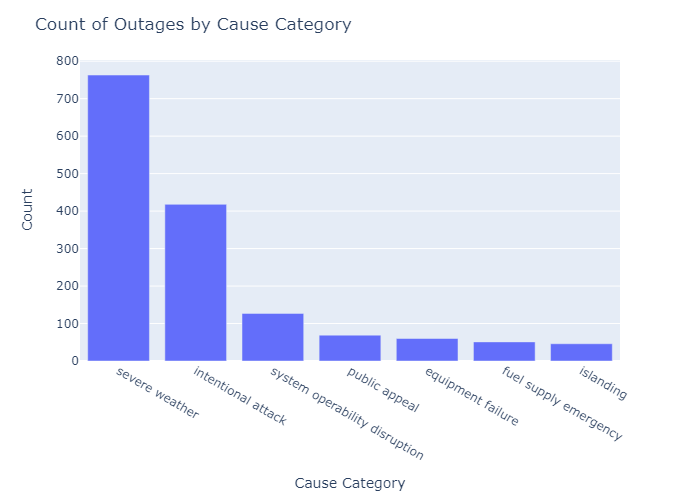

In [25]:
fig = px.bar(df['CAUSE.CATEGORY'].value_counts(), x=df['CAUSE.CATEGORY'].value_counts().index, y=df['CAUSE.CATEGORY'].value_counts().values)
fig.update_layout(title='Count of Outages by Cause Category', xaxis_title='Cause Category', yaxis_title='Count')
fig.show()
# fig.write_html('outage_count_by_category.html', include_plotlyjs='cdn')

### Bivariate Analysis

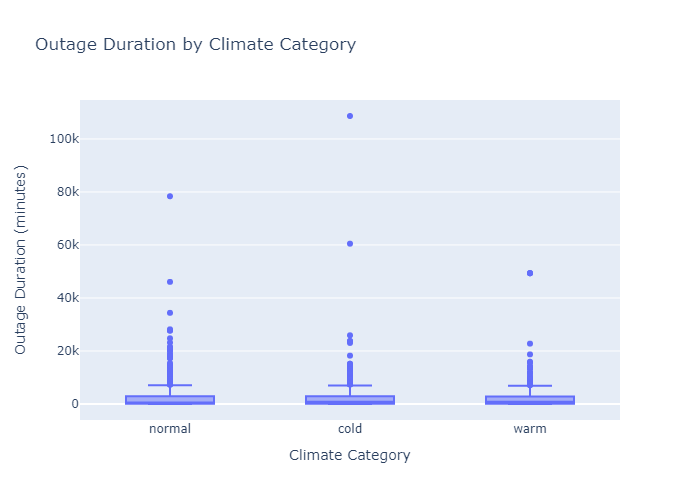

In [26]:
fig = px.box(df, x='CLIMATE.CATEGORY', y='OUTAGE.DURATION(mins)', title='Outage Duration by Climate Category')
fig.update_layout(xaxis_title='Climate Category', yaxis_title='Outage Duration (minutes)')
fig.show()
# fig.write_html('duration_vs_category.html', include_plotlyjs='cdn')

The relationship between residential sales and commericial sales, find some pattern when set the color to population

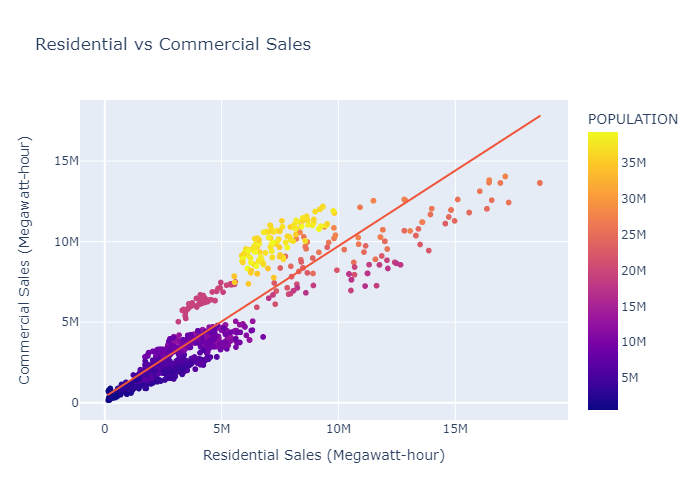

In [27]:
fig = px.scatter(df, x='RES.SALES(Megawatt-hour)', y='COM.SALES(Megawatt-hour)', title='Residential vs Commercial Sales', trendline='ols',color = 'POPULATION')
fig.update_layout(xaxis_title='Residential Sales (Megawatt-hour)', yaxis_title='Commercial Sales (Megawatt-hour)')
fig.show()

# fig.write_html('resales_vs_comsales.html', include_plotlyjs='cdn')

Correlation between each column (Correlation Heatmap)

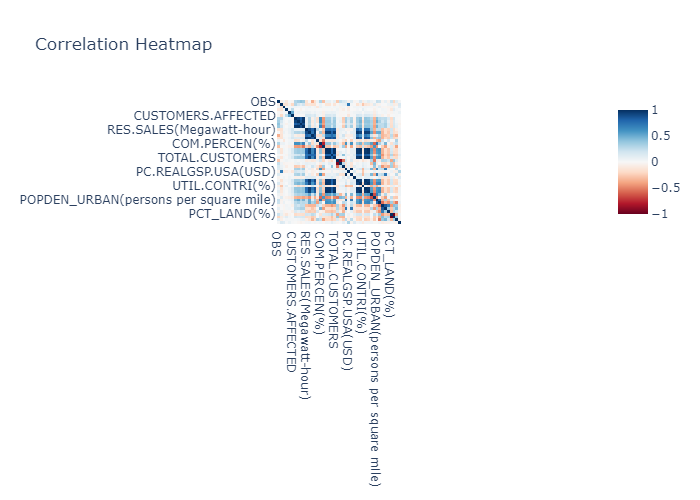

In [28]:
corr_matrix = df.corr()  # Assuming you want to calculate correlations between all numeric columns
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu', title='Correlation Heatmap')
fig.show()
# fig.write_html('correlation_heatmap.html', include_plotlyjs='cdn')

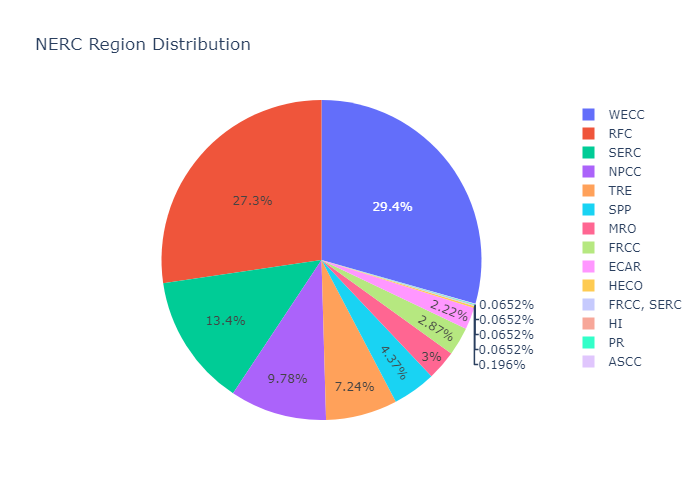

In [29]:
fig = px.pie(df, names='NERC.REGION', title='NERC Region Distribution')
fig.show()
# fig.write_html('region_pie_chary.html', include_plotlyjs='cdn')

## Pivoting and Aggregation -- Interesting Aggregates

In [20]:
# Calculate the total customers affected per year:
total_customers_affected_per_year = pd.DataFrame(df.groupby('YEAR')['CUSTOMERS.AFFECTED'].sum())
total_customers_affected_per_year

CUSTOMERS.AFFECTED
YEAR                    
2000           4270581.0
2001           1431411.0
2002           6382586.0
2003          12463108.0
2004          13592556.0
2005          13552084.0
2006          10152092.0
2007           5973433.0
2008          19964926.0
2009           6813477.0
2010          10108129.0
2011          16438669.0
2012          12703973.0
2013           7018398.0
2014           8022197.0
2015           5629211.0
2016           1993908.0

In [21]:
# Determine the average outage duration per U.S. state and cause category:
pivot_table_outage_duration = df.pivot_table(index='U.S._STATE', columns='CAUSE.CATEGORY', values='OUTAGE.DURATION(mins)', aggfunc='mean', fill_value=0)
pivot_table_outage_duration

CAUSE.CATEGORY        equipment failure  fuel supply emergency  \
U.S._STATE                                                       
Alabama                        0.000000                   0.00   
Arizona                      138.500000                   0.00   
Arkansas                     105.000000                   0.00   
California                   524.809524                6154.60   
Colorado                       0.000000                   0.00   
Connecticut                    0.000000                   0.00   
Delaware                      50.000000                   0.00   
District of Columbia         159.000000                   0.00   
Florida                      554.500000                   0.00   
Georgia                        0.000000                   0.00   
Hawaii                         0.000000                   0.00   
Idaho                          0.000000                   0.00   
Illinois                     149.000000                2761.00   
Indiana                        1.000000               12240.00   
Iowa                           0.000000                   0.00   
Kansas                         0.000000                   0.00   
Kentucky                     652.000000               12570.00   
Louisiana                    176.333333               28170.00   
Maine                          0.000000                1676.00   
Maryland                       0.000000                   0.00   
Massachusetts                  0.000000                2891.00   
Michigan                   26435.333333                   0.00   
Minnesota                      0.000000                   0.00   
Mississippi                    0.000000                   0.00   
Missouri                       0.000000                   0.00   
Montana                        0.000000                   0.00   
Nebraska                       0.000000                   0.00   
Nevada                         0.000000                   0.00   
New Hampshire                  0.000000                   0.00   
New Jersey                     0.000000                   0.00   
New Mexico                     0.000000                  76.00   
New York                     247.000000               16687.25   
North Carolina                 0.000000                   0.00   
North Dakota                   0.000000                   0.00   
Ohio                           0.000000                   0.00   
Oklahoma                       0.000000                   0.00   
Oregon                       200.000000                   0.00   
Pennsylvania                 376.000000                   0.00   
South Carolina                 0.000000                   0.00   
South Dakota                   0.000000                   0.00   
Tennessee                    404.000000                   0.00   
Texas                        405.600000               13920.00   
Utah                          15.000000                   0.00   
Vermont                        0.000000                   0.00   
Virginia                       0.000000                   0.00   
Washington                  1204.000000                   1.00   
West Virginia                  0.000000                   0.00   
Wisconsin                      0.000000               33971.25   
Wyoming                       61.000000                   0.00   

CAUSE.CATEGORY        intentional attack   islanding  public appeal  \
U.S._STATE                                                            
Alabama                        77.000000    0.000000       0.000000   
Arizona                       639.600000    0.000000       0.000000   
Arkansas                      547.833333    3.000000    1063.714286   
California                    946.458333  214.857143    2028.111111   
Colorado                      117.000000    2.000000       0.000000   
Connecticut                    49.125000    0.000000       0.000000   
Delaware                       38.918919    0.000000       0.0000

In [22]:
# Determine the outage frequency per U.S. state and cause category:
pivot_table_outage_frequency = df.pivot_table(index='U.S._STATE', columns='CAUSE.CATEGORY', values='OUTAGE.DURATION(mins)', aggfunc='count', fill_value=0)
pivot_table_outage_frequency

CAUSE.CATEGORY        equipment failure  fuel supply emergency  \
U.S._STATE                                                       
Alabama                               0                      0   
Alaska                                0                      0   
Arizona                               4                      0   
Arkansas                              1                      0   
California                           21                     10   
Colorado                              0                      0   
Connecticut                           0                      0   
Delaware                              1                      0   
District of Columbia                  1                      0   
Florida                               4                      0   
Georgia                               0                      0   
Hawaii                                0                      0   
Idaho                                 0                      0   
Illinois                              1                      1   
Indiana                               1                      1   
Iowa                                  0                      0   
Kansas                                0                      0   
Kentucky                              1                      2   
Louisiana                             3                      1   
Maine                                 0                      1   
Maryland                              0                      0   
Massachusetts                         0                      1   
Michigan                              3                      0   
Minnesota                             0                      0   
Mississippi                           0                      0   
Missouri                              0                      0   
Montana                               0                      0   
Nebraska                              0                      0   
Nevada                                0                      0   
New Hampshire                         0                      0   
New Jersey                            0                      0   
New Mexico                            0                      1   
New York                              2                     12   
North Carolina                        0                      0   
North Dakota                          0                      0   
Ohio                                  0                      0   
Oklahoma                              0                      0   
Oregon                                1                      0   
Pennsylvania                          1                      0   
South Carolina                        0                      0   
South Dakota                          0                      0   
Tennessee                             2                      0   
Texas                                 5                      3   
Utah                                  1                      0   
Vermont                               0                      0   
Virginia                              0                      0   
Washington                            1                      1   
West Virginia                         0                      0   
Wisconsin                             0                      4   
Wyoming                               1                      0   

CAUSE.CATEGORY        intentional attack  islanding  public appeal  \
U.S._STATE                                                           
Alabama                                1          0              0   
Alaska                                 0          0              0   
Arizona                               15          0              0   
Arkansas                               6          1              7   
California                            24         28              9   
Colorado                               5          1              0   
Connect

In [23]:
# Find the maximum customers affected per climate region and year:
pivot_table_customers_affected = df.pivot_table(index='CLIMATE.REGION', columns='YEAR', values='CUSTOMERS.AFFECTED', aggfunc='max', fill_value=0)
pivot_table_customers_affected

YEAR                   2000    2001     2002     2003     2004     2005  \
CLIMATE.REGION                                                            
Central              239567       0    95000  1203000   281000   246990   
East North Central        0       0   190000  2100000   250000   300000   
Northeast                 0  130000   224912  3125350   380000   143000   
Northwest                 0       0        0   200000   187000        0   
South               2000000  114000  1881134   192000   500000  1100000   
Southeast            160000  600000   130000   340000  2775093  3241437   
Southwest            500000       0        0    90000    30000        0   
West                  32000  430984  1500000   241000   505000  1667316   
West North Central        0       0        0        0   120212        0   

YEAR                   2006    2007     2008    2009     2010     2011  \
CLIMATE.REGION                                                           
Central              471932  629590   653000  383000   400000   500000   
East North Central   315000  215000   358000  137000   285000   197166   
Northeast            492955  300000   249408  132000   360000   760113   
Northwest            700000  160000     8000   93300   123535     9000   
South                489478  300000  2504366  800000   500000  1069730   
Southeast            126000  107000   584384  217000   145157   285465   
Southwest             65000       0    74031  140000    31000   204000   
West                1271893  671189  2606931  859554  1700000   165000   
West North Central    15000       0   126000   35500        0    34500   

YEAR                  2012    2013     2014    2015    2016  
CLIMATE.REGION                                               
Central             346000  283451   420000  115000       0  
East North Central  140000  400000   164000  250000  160895  
Northeast           850000   75000   715000  263000   56645  
Northwest           426000  105000        0  500000   56000  
South               262000  881000    57200  454000  415103  
Southeast           880000  283000   677858  186035  203345  
Southwest            30379   35230        0    5763   85179  
West                125000  148000  1400000   80000  110000  
West North Central       0       0        0       0       0

In [24]:
# Determine the average anomaly level per climate category and cause category detail:
pivot_table_anomaly_level = df.pivot_table(index='CLIMATE.CATEGORY', columns='CAUSE.CATEGORY.DETAIL', 
                                           values='ANOMALY.LEVEL', aggfunc='mean', fill_value=0)
pivot_table_anomaly_level

CAUSE.CATEGORY.DETAIL   Coal   Hydro   Natural Gas  100 MW loadshed  \
CLIMATE.CATEGORY                                                      
cold                    -0.5     0.0          -0.6              0.0   
normal                  -0.2    -0.4          -0.3             -0.2   
warm                     0.0     0.0           0.0              0.0   

CAUSE.CATEGORY.DETAIL          Coal  HVSubstation interruption  Hydro  \
CLIMATE.CATEGORY                                                        
cold                  -8.250000e-01                        0.0 -1.200   
normal                 9.251859e-18                       -0.1  0.025   
warm                   0.000000e+00                        0.0  0.000   

CAUSE.CATEGORY.DETAIL  Petroleum  breaker trip  cables  ...  \
CLIMATE.CATEGORY                                        ...   
cold                         0.0     -0.500000     0.0  ...   
normal                      -0.4      0.066667     0.3  ...   
warm                         0.0      0.000000     0.0  ...   

CAUSE.CATEGORY.DETAIL  transmission trip  uncontrolled loss  vandalism  \
CLIMATE.CATEGORY                                                         
cold                               -0.85          -0.500000  -0.747059   
normal                             -0.25          -0.275000  -0.215730   
warm                                0.00           1.144444   1.189474   

CAUSE.CATEGORY.DETAIL  voltage reduction  wildfire  wind  wind storm  \
CLIMATE.CATEGORY                                                       
cold                                 0.0 -0.836364  0.00         0.0   
normal                              -0.3 -0.100000 -0.20        -0.3   
warm                                 0.0  0.620000  0.55         0.0   

CAUSE.CATEGORY.DETAIL  wind/rain    winter  winter storm  
CLIMATE.CATEGORY                                          
cold                   -1.500000 -0.527778     -0.963636  
normal                  0.066667 -0.400000      0.020000  
warm                    0.825000  0.525000      0.958065  

[3 rows x 51 columns]

## Assessment of Missingness

### NMAR Analysis & Missingness Dependency

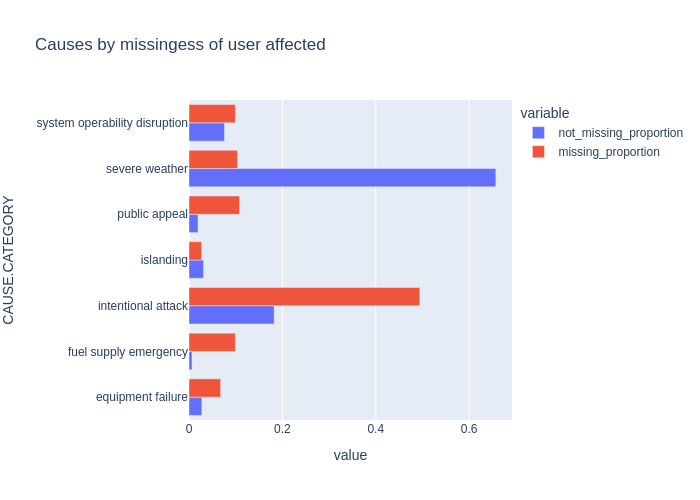

In [25]:
# Does missingness of customers affected depend on the cause category? 
df['CAUSE.CATEGORY']
df.groupby('CAUSE.CATEGORY').count()
df_ca_missing = df[df['CUSTOMERS.AFFECTED'].isna()]
df_ca_not_missing = df[~df['CUSTOMERS.AFFECTED'].isna()]
missing_count = df_ca_missing.groupby('CAUSE.CATEGORY').count()['YEAR']
missing_proportion = pd.Series(np.array(missing_count)/((np.array(missing_count)).sum()), index=missing_count.index)
not_missing_count = df_ca_not_missing.groupby('CAUSE.CATEGORY').count()['YEAR']
not_missing_proportion = pd.Series(np.array(not_missing_count)/((np.array(not_missing_count)).sum()), index=not_missing_count.index)
observed_tvd_statistic = abs(not_missing_proportion - missing_proportion).sum()
observed_dataframe = pd.concat([not_missing_proportion, missing_proportion], axis=1, keys=['not_missing_proportion', 'missing_proportion'])
observed_dataframe.plot(kind='barh', title='Causes by missingess of user affected', barmode='group')

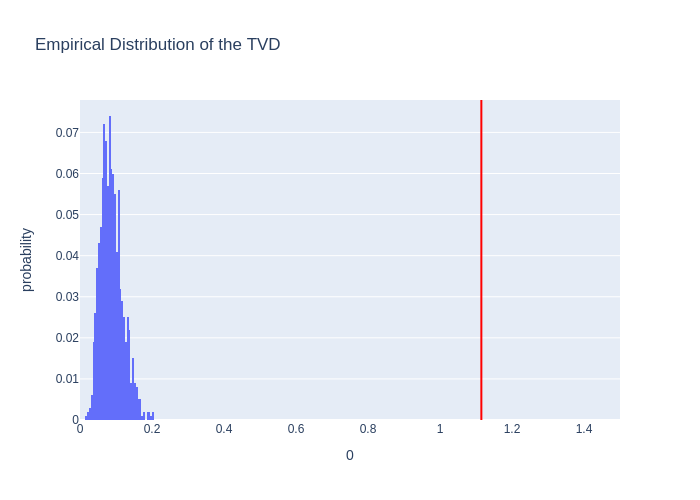

In [26]:
def cause_one_permutation(df):
    df = df.copy()
    df['CUSTOMERS.AFFECTED'] = np.random.permutation(df['CUSTOMERS.AFFECTED'])
    df['CAUSE.CATEGORY']
    df.groupby('CAUSE.CATEGORY').count()
    df_ca_missing = df[df['CUSTOMERS.AFFECTED'].isna()]
    df_ca_not_missing = df[~df['CUSTOMERS.AFFECTED'].isna()]
    missing_count = df_ca_missing.groupby('CAUSE.CATEGORY').count()['YEAR']
    missing_proportion = pd.Series(np.array(missing_count)/((np.array(missing_count)).sum()), index=missing_count.index)
    not_missing_count = df_ca_not_missing.groupby('CAUSE.CATEGORY').count()['YEAR']
    not_missing_proportion = pd.Series(np.array(not_missing_count)/((np.array(not_missing_count)).sum()), index=not_missing_count.index)
    observed_tvd_statistic = abs(not_missing_proportion - missing_proportion).sum()
    return observed_tvd_statistic
# do permutation 1000 times
result = []
for i in range(1000):
    result.append(cause_one_permutation(df))
fig = px.histogram(pd.DataFrame(result), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the TVD')
fig.add_vline(x=observed_tvd_statistic, line_color='red')
fig.update_layout(xaxis_range=[0, 1.5])

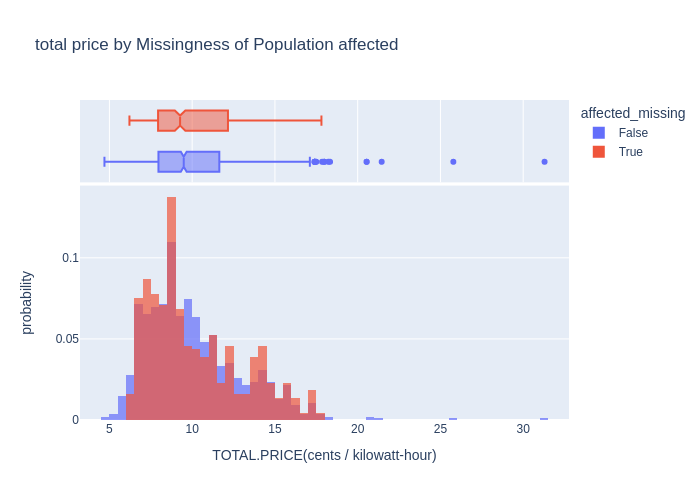

In [27]:
# Does missingness of customers affected depend on the cause category? 
from scipy import stats
df['TOTAL.PRICE(cents / kilowatt-hour)']
df.groupby('TOTAL.PRICE(cents / kilowatt-hour)').count()
df_ca_missing = df[df['CUSTOMERS.AFFECTED'].isna()]
df_ca_not_missing = df[~df['CUSTOMERS.AFFECTED'].isna()]
missing_distribution = df_ca_missing['TOTAL.PRICE(cents / kilowatt-hour)']
not_missing_distribution = df_ca_not_missing['TOTAL.PRICE(cents / kilowatt-hour)']
observed_dataframe = pd.concat([not_missing_distribution, missing_distribution], axis=1, keys=['not_missing_proportion', 'missing_proportion'])
specific_df = df[['TOTAL.PRICE(cents / kilowatt-hour)','CUSTOMERS.AFFECTED' ]].copy()
specific_df['affected_missing'] = specific_df['CUSTOMERS.AFFECTED'].isna()
per_na = df_ca_missing['TOTAL.PRICE(cents / kilowatt-hour)']
per_va = df_ca_not_missing['TOTAL.PRICE(cents / kilowatt-hour)']
obsersed_stat2 = stats.ks_2samp(per_na, per_va).statistic
px.histogram(specific_df, x='TOTAL.PRICE(cents / kilowatt-hour)', color='affected_missing', histnorm='probability', marginal='box',
             title="total price by Missingness of Population affected", barmode='overlay', opacity=0.7)

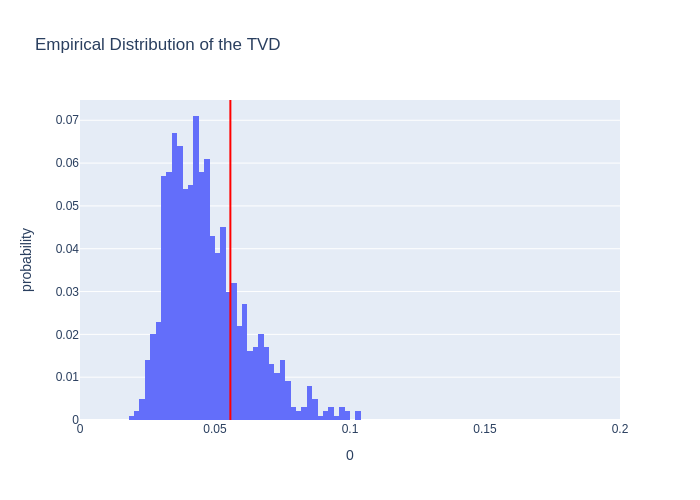

In [28]:
def cause_one_permutation2(df):
    df = df.copy()
    df['CUSTOMERS.AFFECTED'] = np.random.permutation(df['CUSTOMERS.AFFECTED'])
    df['TOTAL.PRICE(cents / kilowatt-hour)']
    df.groupby('TOTAL.PRICE(cents / kilowatt-hour)').count()
    df_ca_missing = df[df['CUSTOMERS.AFFECTED'].isna()]
    df_ca_not_missing = df[~df['CUSTOMERS.AFFECTED'].isna()]
    specific_df = df[['TOTAL.PRICE(cents / kilowatt-hour)','CUSTOMERS.AFFECTED' ]].copy()
    specific_df['affected_missing'] = specific_df['CUSTOMERS.AFFECTED'].isna()
    per_na = df_ca_missing['TOTAL.PRICE(cents / kilowatt-hour)']
    per_va = df_ca_not_missing['TOTAL.PRICE(cents / kilowatt-hour)']
    obsersed_stat = stats.ks_2samp(per_na, per_va).statistic
    return obsersed_stat
result2 = []
for i in range(1000):
    result2.append(cause_one_permutation2(df))
fig2 = px.histogram(pd.DataFrame(result2), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the TVD')
fig2.add_vline(x=obsersed_stat2, line_color='red')
fig2.update_layout(xaxis_range=[0, 0.2])

In [29]:
p_value1 = (np.array(result) > observed_tvd_statistic).mean()
p_value2 = (np.array(result2) > obsersed_stat2).mean()
observed_tvd_statistic

1.1148675909814136

## Hypothesis Testing

observed: overall_duration 2625.39837398374 west_duration 1628.331707317073
p value for the duration hypothesis test =  0.0003


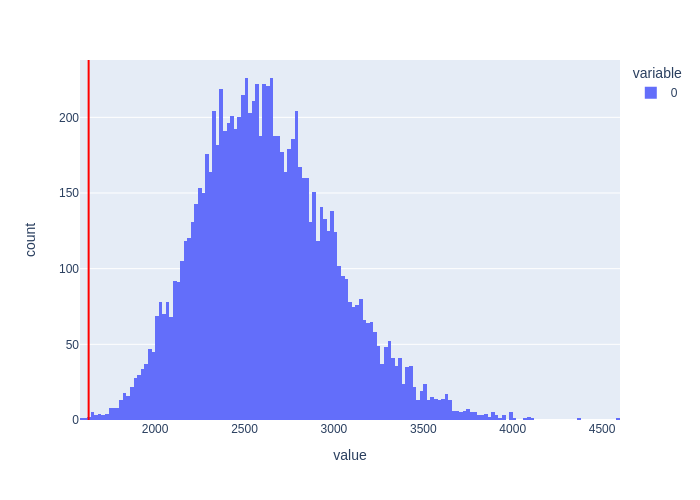

In [30]:
west_duration = df[df['CLIMATE.REGION']=='West']['OUTAGE.DURATION(mins)']
overall_duration = df['OUTAGE.DURATION(mins)']
print('observed:', 'overall_duration',overall_duration.mean(), 'west_duration',west_duration.mean())

duration_simulation_result = []
for i in range(10000):
    each_duration_simulation = pd.Series(np.random.choice(overall_duration, size=len(west_duration), replace=False)).mean()
    duration_simulation_result.append(each_duration_simulation)
p_val_hypo_1 = (np.array(duration_simulation_result) < west_duration.mean()).mean()
print('p value for the duration hypothesis test = ', p_val_hypo_1)
fig_hyp1 = px.histogram(duration_simulation_result)
fig_hyp1.add_vline(west_duration.mean(), line_color='red')

## Hypothesis test: people affected

observed: overall_affected:  143456.22273143905 west_affected:  194579.89393939395
p value for the duration hypothesis test =  0.0144


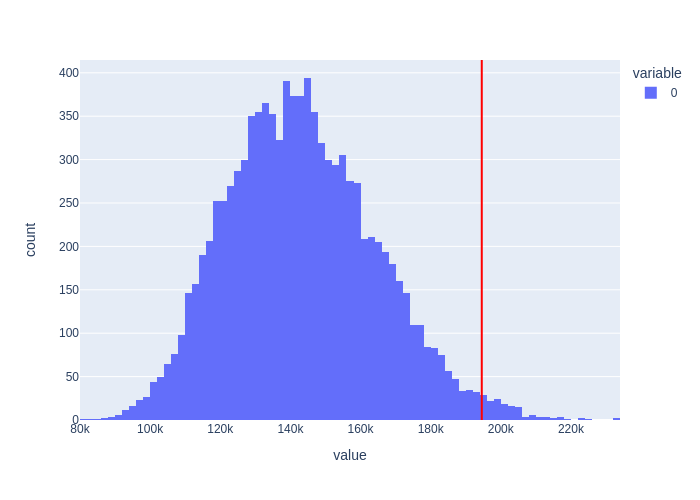

In [31]:
west_affected = df[df['CLIMATE.REGION']=='West']['CUSTOMERS.AFFECTED']
overall_affected = df['CUSTOMERS.AFFECTED']
print('observed:', 'overall_affected: ',overall_affected.mean(), 'west_affected: ',west_affected.mean())

affected_simulation_result = []
for i in range(10000):
    each_affected_simulation = pd.Series(np.random.choice(overall_affected, size=len(west_affected), replace=False)).mean()
    affected_simulation_result.append(each_affected_simulation)
p_val_hypo_2 = (np.array(affected_simulation_result) > west_affected.mean()).mean()
print('p value for the duration hypothesis test = ', p_val_hypo_2)
fig_hyp2 = px.histogram(affected_simulation_result)
fig_hyp2.add_vline(west_affected.mean(), line_color='red')